# EDA

Se importan las librerías que se utilizarán a lo largo del EDA.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import os
import string
from wordcloud import WordCloud




Se importan los Datasets de forma que puedan ser leídos en cualquier entorno virtual

In [4]:
base_dir = os.getcwd()

file_path = os.path.join(base_dir, 'Datasets', 'movies_FINAL.csv')
print("Ruta absoluta del archivo CSV:", os.path.abspath(file_path))
df_peliculas = pd.read_csv(file_path)

file_path1 = os.path.join(base_dir, 'Datasets', 'cast.parquet')
print("Ruta absoluta del archivo Parquet:", os.path.abspath(file_path1))
df_cast = pd.read_parquet(file_path1)

file_path2 = os.path.join(base_dir, 'Datasets', 'crew.parquet')
print("Ruta absoluta del archivo Parquet:", os.path.abspath(file_path2))
df_crew = pd.read_parquet(file_path2)

Ruta absoluta del archivo CSV: c:\Users\jessi\Desktop\PI Henry\Datasets\movies_FINAL.csv
Ruta absoluta del archivo Parquet: c:\Users\jessi\Desktop\PI Henry\Datasets\cast.parquet
Ruta absoluta del archivo Parquet: c:\Users\jessi\Desktop\PI Henry\Datasets\crew.parquet


- Movies_final: 
El dataset contiene una amplia variedad de información sobre películas, abarcando desde detalles de producción hasta características específicas de cada película.

- Crew:
Contiene información sobre el equipo de producción de las películas.
Columnas principales: movie_id, crew_credit_id, crew_department, crew_gender, crew_job, crew_name, crew_profile_path.

- Cast:
Contiene información sobre los actores y actrices de las películas.
Columnas principales: movie_id, cast_cast_id, cast_character, cast_gender, cast_id, cast_name, cast_order, cast_profile_path.

Información sobre cada columna

In [3]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adult                     45463 non-null  bool   
 1   budget                    45463 non-null  int64  
 2   homepage                  7779 non-null   object 
 3   movie_id                  45463 non-null  int64  
 4   imdb_id                   45446 non-null  object 
 5   original_language         45452 non-null  object 
 6   original_title            45463 non-null  object 
 7   overview                  44509 non-null  object 
 8   popularity                45463 non-null  float64
 9   release_date              45379 non-null  object 
 10  revenue                   45463 non-null  int64  
 11  runtime                   45206 non-null  float64
 12  status                    45382 non-null  object 
 13  title                     45463 non-null  object 
 14  video 

Estadisticas descriptivas de las variables cuantitativas

In [4]:
df_peliculas.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45463.000000,4.546300e+04,45206.000000,45463.000000,45463.000000
mean,4.224579e+06,108359.918813,2.921378,1.120861e+07,94.127572,5.618217,109.890856
std,1.742413e+07,112460.749278,6.005234,6.433019e+07,38.406803,1.924174,491.294816
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127757,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678588,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Identificación de valores nulos


In [5]:
null_values1 = df_peliculas.isnull().sum()
null_values1

adult                           0
budget                          0
homepage                    37684
movie_id                        0
imdb_id                        17
original_language              11
original_title                  0
overview                      954
popularity                      0
release_date                   84
revenue                         0
runtime                       257
status                         81
title                           0
video                           0
vote_average                    0
vote_count                      0
collection_name             42295
collection_backdrop_path    42295
company_names_array             0
countries_names_array           0
languages_names_array           0
genres_names_array              0
dtype: int64

Movies_final
Hay varias columnas con valores nulos, especialmente homepage, collection_name y collection_backdrop_path.


Valores nulos:

Columnas como homepage, collection_name y collection_backdrop_path tienen muchos valores nulos.
Columnas como overview, release_date, y runtime tienen algunos valores nulos que podrían ser importantes.

In [5]:
null_values2 = df_cast.isnull().sum()
null_values2

movie_id             0
cast_character    2418
cast_gender       2418
cast_name         2418
cast_order        2418
dtype: int64

La columna cast_profile_path muestra un alto número de valores nulos (176,274), lo que indica que muchos actores y actrices no tienen una imagen de perfil asociada.

La columna cast_character tiene 28,201 valores nulos, lo que podría indicar que el personaje no está especificado para ciertos actores en algunas películas.

Varias columnas (cast_cast_id, cast_gender, cast_id, cast_name, cast_order) tienen 2,418 valores nulos, lo que podría indicar registros incompletos para ciertos actores en algunas películas.

In [6]:
null_values3 = df_crew.isnull().sum()
null_values3

movie_id                  0
crew_credit_id          771
crew_department         771
crew_gender             771
crew_job                771
crew_name               771
crew_profile_path    369987
dtype: int64

-Crew
La columna crew_profile_path presenta un alto número de valores nulos (369,987), lo que sugiere que no todos los miembros del equipo tienen una imagen de perfil asociada.

Otras columnas (crew_credit_id, crew_department, crew_gender, crew_job, crew_name) tienen 771 valores nulos, lo que podría indicar registros incompletos para ciertos miembros del equipo en algunas películas.


# Gráficos de análisis

In [6]:
sns.set(style="whitegrid")


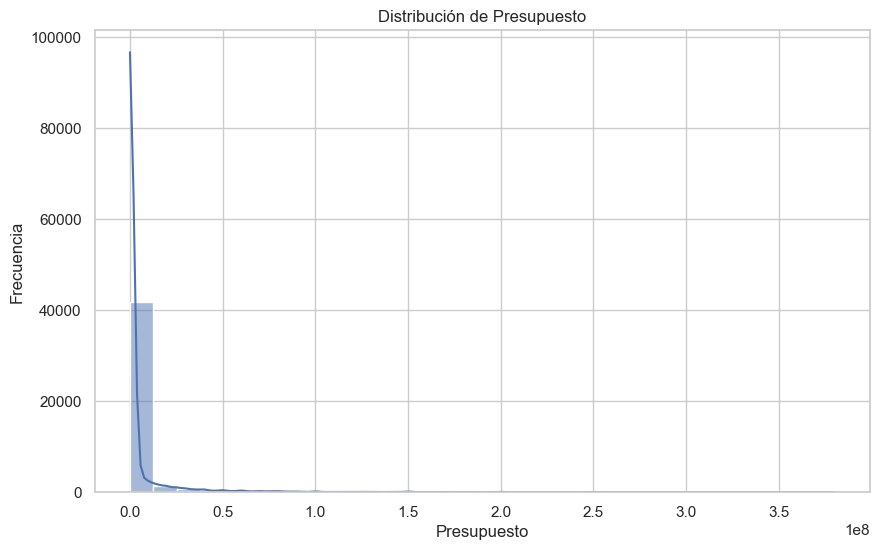

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_peliculas['budget'], bins=30, kde=True)
plt.title('Distribución de Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de correlación entre variables numéricas


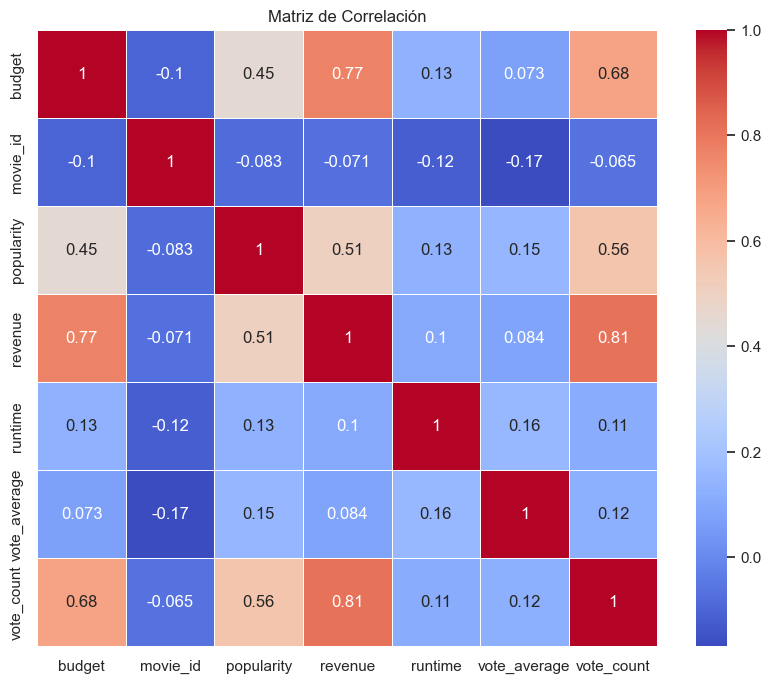

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_peliculas.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


genres_names_array
Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
Name: count, dtype: int64


C:\Users\jessi\AppData\Local\Temp\ipykernel_5832\3794540883.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)


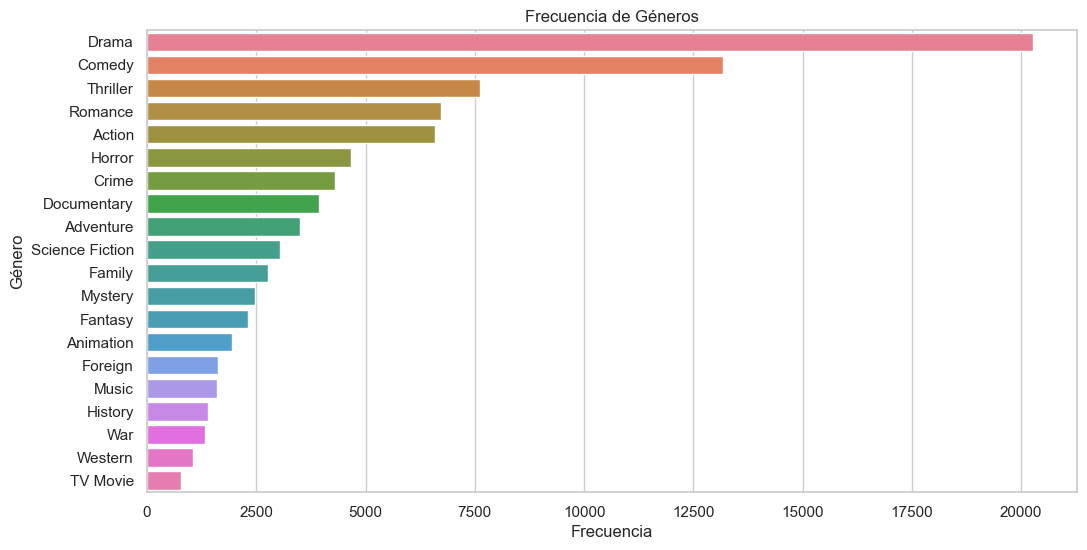

In [9]:
# Definir la función safe_eval
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

# Aplicar la función a la columna 'genres_names_array'
df_peliculas['genres_names_array'] = df_peliculas['genres_names_array'].apply(safe_eval)

# Eliminar duplicados en las columnas
df = df_peliculas.loc[:, ~df_peliculas.columns.duplicated()]

# Expandir todas las listas en una sola serie
all_genres = df_peliculas['genres_names_array'].explode()

# Calcular la frecuencia de cada género
genre_counts = all_genres.value_counts()

# Mostrar la frecuencia de cada género
print(genre_counts)

# Gráfico de barras de la frecuencia de cada género
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(genre_counts))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)
plt.title('Frecuencia de Géneros')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()


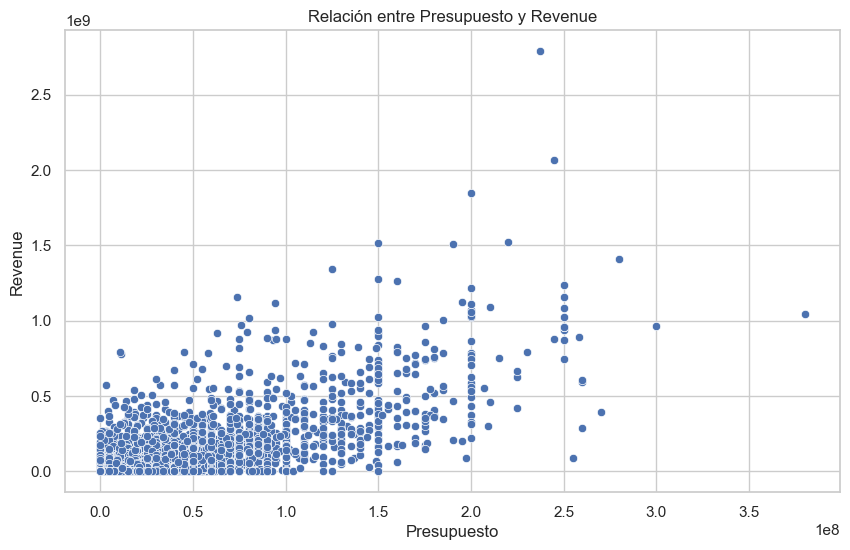

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre Presupuesto y Revenue')
plt.xlabel('Presupuesto')
plt.ylabel('Revenue')
plt.show()


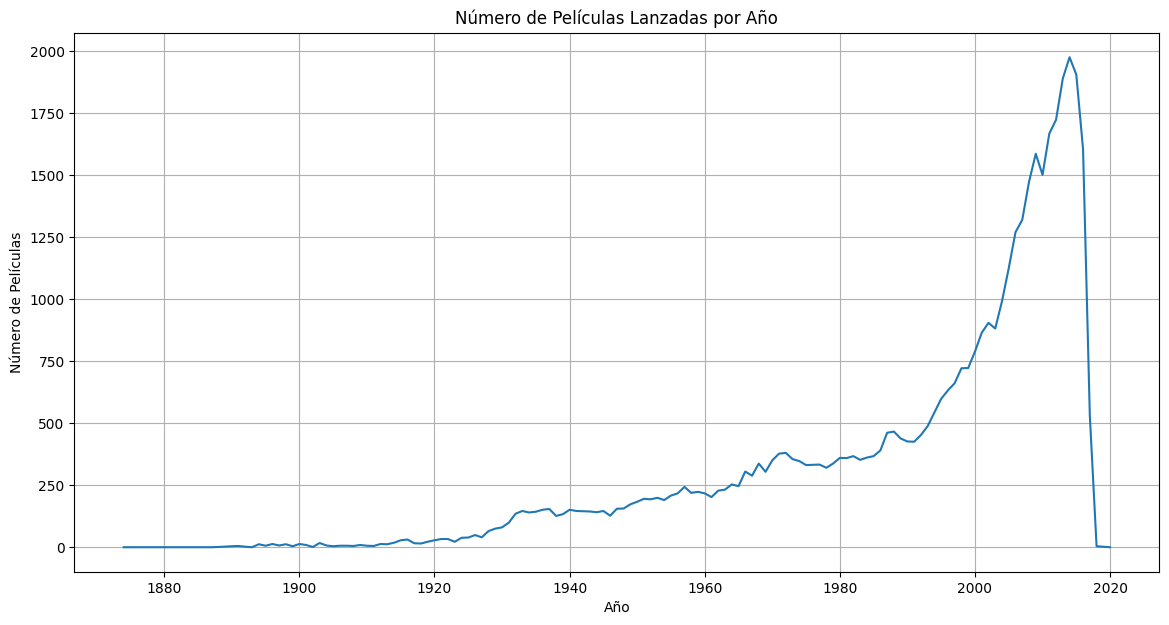

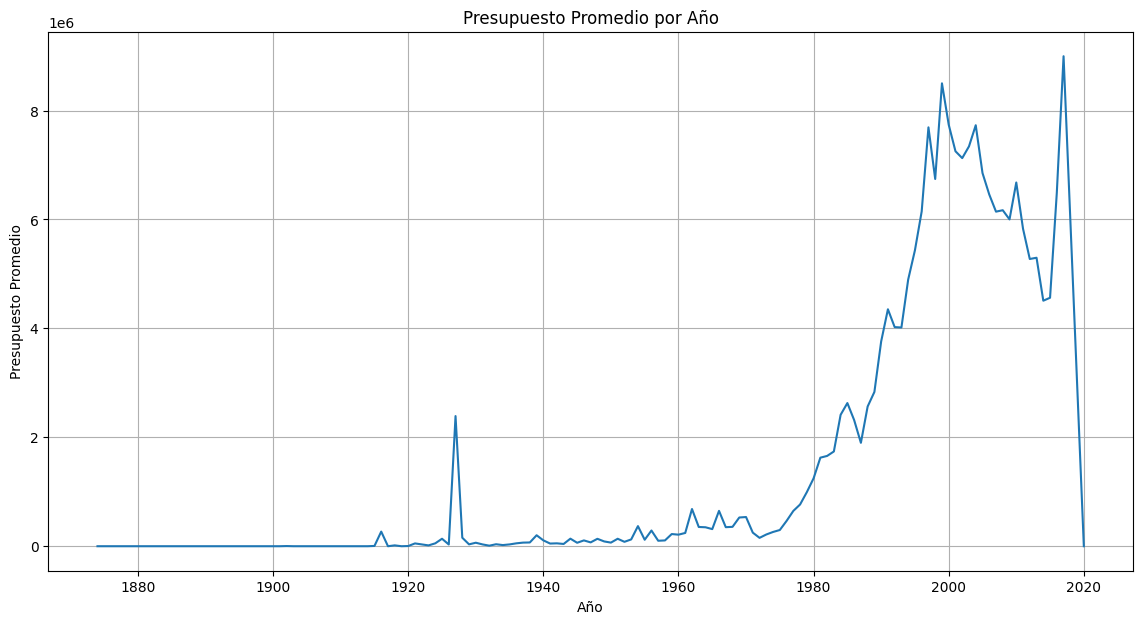

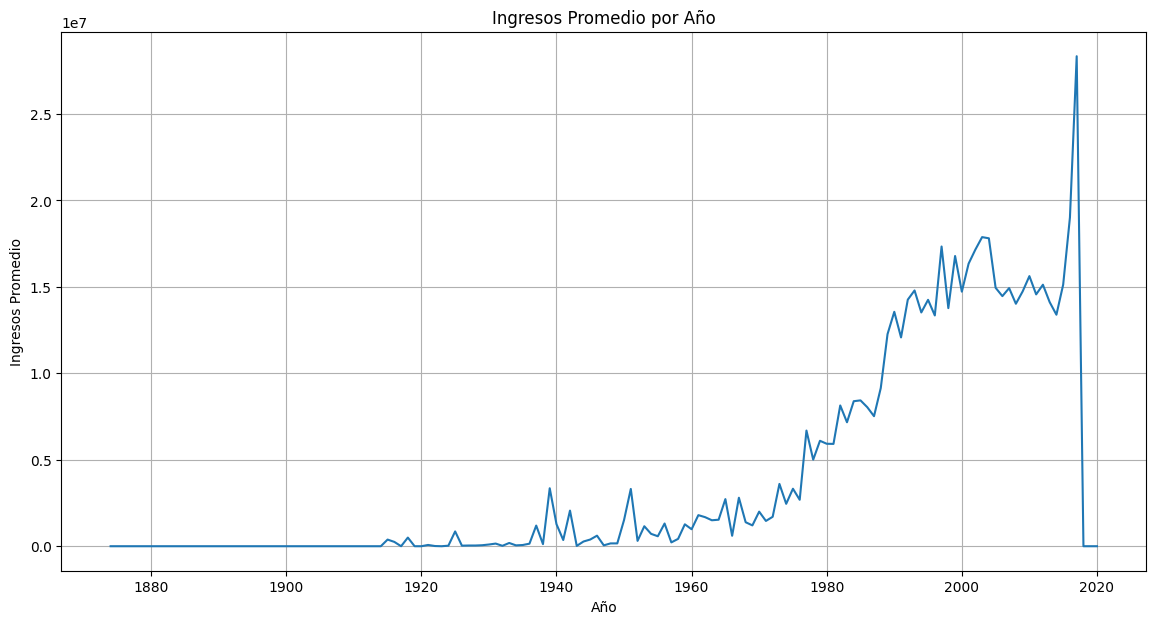

In [10]:
# Convertir release_date a formato de fecha
df_peliculas['release_date'] = pd.to_datetime(df_peliculas['release_date'], errors='coerce')

df_peliculas = df_peliculas.dropna(subset=['release_date'])

df_peliculas['release_year'] = df_peliculas['release_date'].dt.year

# Filtrar datos válidos
df_peliculas = df_peliculas.dropna(subset=['release_year'])

# Calcular el número de películas lanzadas por año
movies_per_year = df_peliculas['release_year'].value_counts().sort_index()

# Calcular el presupuesto promedio por año
average_budget_per_year = df_peliculas.groupby('release_year')['budget'].mean()

# Calcular los ingresos promedio por año
average_revenue_per_year = df_peliculas.groupby('release_year')['revenue'].mean()

# Visualizar el número de películas lanzadas por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Número de Películas Lanzadas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

# Visualizar el presupuesto promedio por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_budget_per_year.index, y=average_budget_per_year.values)
plt.title('Presupuesto Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Presupuesto Promedio')
plt.grid(True)
plt.show()

# Visualizar los ingresos promedio por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_revenue_per_year.index, y=average_revenue_per_year.values)
plt.title('Ingresos Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos Promedio')
plt.grid(True)
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_20064\914966508.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_genre.values, y=average_revenue_by_genre.index, palette='viridis')


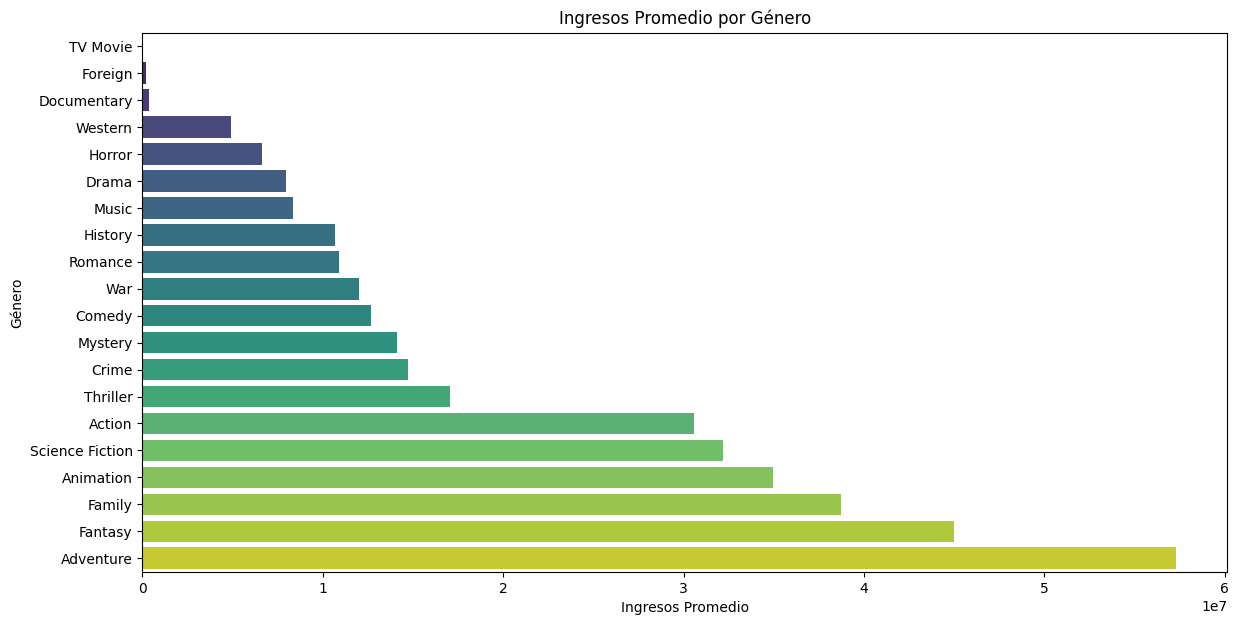

In [11]:
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

# Aplicar la función a la columna 'genres_names_array'
df_peliculas['genres_names_array'] = df_peliculas['genres_names_array'].apply(safe_eval)

# Expandir todas las listas en una sola serie
all_genres_expanded = df_peliculas.explode('genres_names_array')

# Agrupar los datos por género y calcular los ingresos promedio
average_revenue_by_genre = all_genres_expanded.groupby('genres_names_array')['revenue'].mean().sort_values()

# Visualizar los ingresos promedio por género utilizando un gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x=average_revenue_by_genre.values, y=average_revenue_by_genre.index, palette='viridis')
plt.title('Ingresos Promedio por Género')
plt.xlabel('Ingresos Promedio')
plt.ylabel('Género')
plt.show()

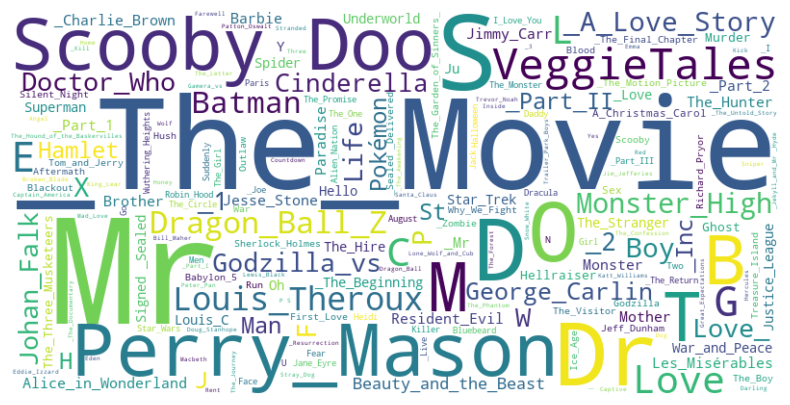

In [18]:
df_peliculas['title'] = df_peliculas['title'].str.replace(' ', '_')

# Unir todos los títulos de las películas en un solo string
text = ' '.join(df_peliculas['title'].dropna().tolist())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()